In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 1024)
        self.up1 = Up(1024+512, 512)
        self.up2 = Up(512+256, 256)
        self.up3 = Up(256+128, 128)
        self.up4 = Up(128+64, 64)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

# Instantiate the model
model = UNet(n_channels=3, n_classes=1)

print("Corrected UNet model architecture defined and instantiated.")



Corrected UNet model architecture defined and instantiated.


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision


class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 1024)
        self.up1 = Up(1024+512, 512)
        self.up2 = Up(512+256, 256)
        self.up3 = Up(256+128, 128)
        self.up4 = Up(128+64, 64)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

model = UNet(n_channels=3, n_classes=1)

In [24]:
from pycocotools.coco import COCO
import numpy as np
from PIL import Image
import os

ann_dir = "/content/drive/MyDrive/Masks"
img_dir = "/content/drive/MyDrive/val2017"
out_mask_dir = "/content/drive/MyDrive/val2017/masks_png"
os.makedirs(out_mask_dir, exist_ok=True)

json_files = [f for f in os.listdir(ann_dir) if f.endswith(".json")]

for json_file in json_files:
    ann_path = os.path.join(ann_dir, json_file)
    coco = COCO(ann_path)

    img_ids = coco.getImgIds()
    for img_id in img_ids:
        img_info = coco.loadImgs(img_id)[0]
        anns = coco.loadAnns(coco.getAnnIds(imgIds=img_id))

        mask = np.zeros((img_info["height"], img_info["width"]), dtype=np.uint8)

        for ann in anns:
            mask = np.maximum(mask, coco.annToMask(ann) * 255)
        mask_img = Image.fromarray(mask)
        mask_name = img_info['file_name'].replace(".jpg", ".png")
        mask_img.save(os.path.join(out_mask_dir, mask_name))

print("Mask generation completed!")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Mask generation completed!


In [19]:
import os
import numpy as np
from PIL import Image
from pycocotools.coco import COCO
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

images_dir = "/content/drive/MyDrive/val2017"
masks_dir = "/content/drive/MyDrive/Masks"
out_mask_dir = "/content/drive/MyDrive/val2017/masks_png"
os.makedirs(out_mask_dir, exist_ok=True)

json_files = [f for f in os.listdir(masks_dir) if f.endswith(".json")]
for json_file in json_files:
    ann_path = os.path.join(masks_dir, json_file)
    coco = COCO(ann_path)
    img_ids = coco.getImgIds()
    for img_id in img_ids:
        img_info = coco.loadImgs(img_id)[0]
        anns = coco.loadAnns(coco.getAnnIds(imgIds=img_id))
        mask = np.zeros((img_info["height"], img_info["width"]), dtype=np.uint8)
        for ann in anns:
            mask = np.maximum(mask, coco.annToMask(ann) * 255)
        mask_img = Image.fromarray(mask)
        mask_name = img_info['file_name'].replace(".jpg", ".png")
        mask_img.save(os.path.join(out_mask_dir, mask_name))


class SegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_img=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))
        self.valid_pairs = []
        for img_name in self.image_files:
            mask_name = img_name.replace(".jpg", ".png")
            if mask_name in self.mask_files:
                self.valid_pairs.append((img_name, mask_name))
        self.transform_img = transform_img
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.valid_pairs)

    def __getitem__(self, idx):
        img_name, mask_name = self.valid_pairs[idx]
        img_path = os.path.join(self.images_dir, img_name)
        mask_path = os.path.join(self.masks_dir, mask_name)

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_img:
            image = self.transform_img(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)
            mask = (mask > 0).float()

        return image, mask

transform_img = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

dataset = SegmentationDataset(images_dir=images_dir,
                              masks_dir=out_mask_dir,
                              transform_img=transform_img,
                              transform_mask=transform_mask)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(nn.MaxPool2d(2), DoubleConv(in_channels, out_channels))
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX//2, diffX-diffX//2,
                        diffY//2, diffY-diffY//2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super().__init__()
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 1024)
        self.up1 = Up(1024 + 512, 512)
        self.up2 = Up(512 + 256, 256)
        self.up3 = Up(256 + 128, 128)
        self.up4 = Up(128 + 64, 64)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        return self.outc(x)

model = UNet(n_channels=3, n_classes=1).to(device)

def train_model(model, train_loader, val_loader, num_epochs=5):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                val_loss += criterion(outputs, masks).item()

        print(f"Epoch [{epoch+1}/{num_epochs}] - "
              f"Train Loss: {avg_loss:.4f} - "
              f"Val Loss: {val_loss/len(val_loader):.4f}")

    return model

trained_model = train_model(model, train_loader, val_loader, num_epochs=5)
torch.save(trained_model.state_dict(), "unet_model.pth")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Epoch [1/5] - Train Loss: 0.6970 - Val Loss: 0.6945
Epoch [2/5] - Train Loss: 0.5982 - 

In [25]:
import torch
torch.save(trained_model.state_dict(), "my_unet_model.pth")
print("Model saved as my_unet_model.pth")

Model saved as my_unet_model.pth


In [26]:

import torch
import torch.nn as nn
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
model = deeplabv3_resnet50(weights=DeepLabV3_ResNet50_Weights.DEFAULT)
model.classifier[4] = nn.Conv2d(256, 1, kernel_size=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Pre-trained model loaded and final layer adjusted.")

Pre-trained model loaded and final layer adjusted.


In [27]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
num_epochs = 5

def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)["out"]
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)

        avg_train_loss = train_loss / len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)["out"]
                loss = criterion(outputs, masks)
                val_loss += loss.item() * images.size(0)

        avg_val_loss = val_loss / len(val_loader.dataset)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return model

trained_model = train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)


Epoch [1/5] - Train Loss: 0.6061, Val Loss: 0.7006
Epoch [2/5] - Train Loss: 0.5497, Val Loss: 0.6721
Epoch [3/5] - Train Loss: 0.4945, Val Loss: 0.6461
Epoch [4/5] - Train Loss: 0.4521, Val Loss: 0.6224
Epoch [5/5] - Train Loss: 0.4219, Val Loss: 0.6032


In [28]:
torch.save(trained_model.state_dict(), "deeplabv3_model.pth")
print("DeepLabV3 model saved.")


DeepLabV3 model saved.


VALUATION

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def pixel_accuracy(outputs, masks):
    preds = (torch.sigmoid(outputs) > 0.5).long()
    correct = (preds == masks.long()).sum().item()
    total = torch.numel(preds)
    return correct / total

def iou_score(outputs, masks, eps=1e-6):
    preds = (torch.sigmoid(outputs) > 0.5).long()
    intersection = (preds & masks.long()).sum().item()
    union = (preds | masks.long()).sum().item()
    return (intersection + eps) / (union + eps)

def dice_score(outputs, masks, eps=1e-6):
    preds = (torch.sigmoid(outputs) > 0.5).long()
    intersection = (preds & masks.long()).sum().item()
    return (2 * intersection + eps) / (preds.sum().item() + masks.sum().item() + eps)

def evaluate_model(model, loader, device):
    model.eval()
    total_acc, total_iou, total_dice = 0.0, 0.0, 0.0
    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)["out"] if isinstance(model(images), dict) else model(images)
            total_acc += pixel_accuracy(outputs, masks)
            total_iou += iou_score(outputs, masks)
            total_dice += dice_score(outputs, masks)
    return (total_acc / len(loader), total_iou / len(loader), total_dice / len(loader))

acc, iou, dice = evaluate_model(trained_model, val_loader, device)
print(f"Val Pixel Acc: {acc:.4f}, IoU: {iou:.4f}, Dice: {dice:.4f}")


Val Pixel Acc: 0.6936, IoU: 0.5782, Dice: 0.7328


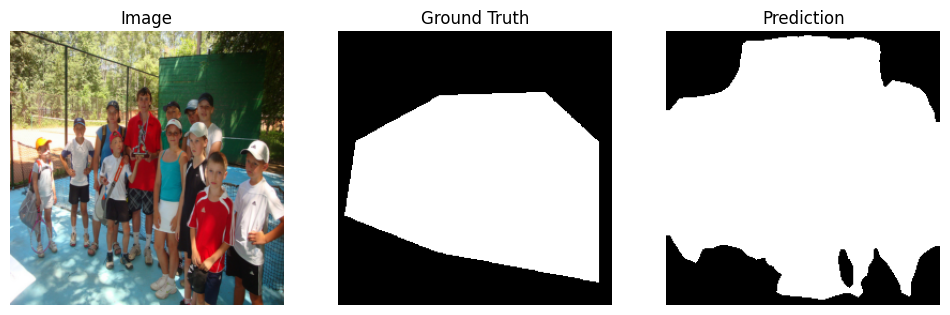

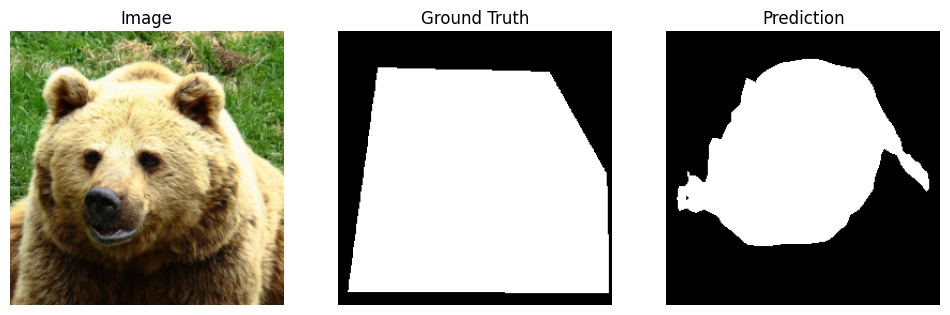

In [30]:
def visualize_predictions(model, loader, device, num_samples=3):
    model.eval()
    images_shown = 0
    with torch.no_grad():
        for images, masks in loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)["out"] if isinstance(model(images), dict) else model(images)
            preds = (torch.sigmoid(outputs) > 0.5).cpu().numpy()

            for i in range(images.size(0)):
                if images_shown >= num_samples:
                    return
                img = images[i].cpu().permute(1, 2, 0).numpy()
                mask = masks[i].cpu().squeeze().numpy()
                pred = preds[i].squeeze()

                fig, axs = plt.subplots(1, 3, figsize=(12, 4))
                axs[0].imshow(img)
                axs[0].set_title("Image")
                axs[1].imshow(mask, cmap="gray")
                axs[1].set_title("Ground Truth")
                axs[2].imshow(pred, cmap="gray")
                axs[2].set_title("Prediction")
                for ax in axs: ax.axis("off")
                plt.show()

                images_shown += 1

visualize_predictions(trained_model, val_loader, device, num_samples=5)


In [32]:
import torch

def pixel_accuracy(outputs, masks, threshold=0.5):
    preds = (torch.sigmoid(outputs) > threshold).float()
    correct = (preds == masks).float()
    return correct.sum() / correct.numel()

def iou_score(outputs, masks, threshold=0.5, smooth=1e-6):
    preds = (torch.sigmoid(outputs) > threshold).float()
    intersection = (preds * masks).sum()
    union = preds.sum() + masks.sum() - intersection
    return (intersection + smooth) / (union + smooth)

def dice_score(outputs, masks, threshold=0.5, smooth=1e-6):
    preds = (torch.sigmoid(outputs) > threshold).float()
    intersection = (preds * masks).sum()
    return (2 * intersection + smooth) / (preds.sum() + masks.sum() + smooth)


In [34]:
import torch

def pixel_accuracy(outputs, masks, threshold=0.5):
    preds = (torch.sigmoid(outputs) > threshold).float()
    correct = (preds == masks).float()
    return correct.sum() / correct.numel()

def iou_score(outputs, masks, threshold=0.5, smooth=1e-6):
    preds = (torch.sigmoid(outputs) > threshold).float()
    intersection = (preds * masks).sum()
    union = preds.sum() + masks.sum() - intersection
    return (intersection + smooth) / (union + smooth)

def dice_score(outputs, masks, threshold=0.5, smooth=1e-6):
    preds = (torch.sigmoid(outputs) > threshold).float()
    intersection = (preds * masks).sum()
    return (2 * intersection + smooth) / (preds.sum() + masks.sum() + smooth)


model.eval()
train_pixel_acc = 0.0
train_iou = 0.0
train_dice = 0.0
count = 0

with torch.no_grad():
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        outputs = model(images)

        if isinstance(outputs, dict):
            outputs = outputs["out"]

        train_pixel_acc += pixel_accuracy(outputs, masks)
        train_iou += iou_score(outputs, masks)
        train_dice += dice_score(outputs, masks)
        count += 1

print(f"Train Pixel Acc: {train_pixel_acc / count:.4f}")
print(f"Train IoU: {train_iou / count:.4f}")
print(f"Train Dice: {train_dice / count:.4f}")


Train Pixel Acc: 0.8586
Train IoU: 0.5793
Train Dice: 0.7336
